In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from numpy import where
from matplotlib import pyplot
from imblearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#url = ("C:\Users\pdarg\PycharmProjects\pythonProject\lenexadata_v12.csv")

tips = pd.read_csv(r"C:\Users\pdarg\PycharmProjects\pythonProject\lenexadata_v12.csv")


In [4]:
#top 5 rows for all columns
print("\n first 5 rows of all columns")
print(tips.head())

#top 5 rows for given columns
print("\n first 5 rows of gender, age, and bmi")
print(tips [["gender", "age", "bmi"]].head(5))

#Average for column grouped by gender
#print("\nmean")
#print(tips.groupby("gender").agg({"age" : np.mean}))

#Standard deviation for column
#print("\nstandard deviation")
#print(tips.agg({"respiratory_illnesses" : np.std}))

#Mode for column grouped by gender
#print("\nmode")
#print(tips.groupby("gender").agg({"age" : stats.mode}))
#print(stats.mode(tips["age"].to_list()))

#Highlight number of negative and positive in column
print("\nprinting number of negative values")
#Cast the column to a list to perform the operations
pi = tips["pressure_injury"].to_list()
print (sum(n < 0 for n in pi))

print("\nprinting number of positive values")
print (sum(n > 0 for n in pi))
#print(tips["pressure_injury"].value_counts())
#tips["pressure_injury"].plot()


 first 5 rows of all columns
  gender    age    bmi sensory_perception_score moisture_score activity_score  \
0      M  76.52  32.40                        C              B              D   
1      M  41.79  30.54                        D              B              D   
2      F  39.86  35.97                        C              A              D   
3      F  47.82  25.43                        C              A              D   
4      F  47.45  24.53                        B              B              D   

  mobility_score nutrition_score  diabetes  smoker  ...  pneumonia  \
0              C               D         0       0  ...          0   
1              D               C         0       0  ...          0   
2              C               B         1       0  ...          0   
3              C               C         0       0  ...          0   
4              C               B         0       0  ...          0   

   anemia_and_haemoglobinopathies  hyperlipidemias  bone_infec

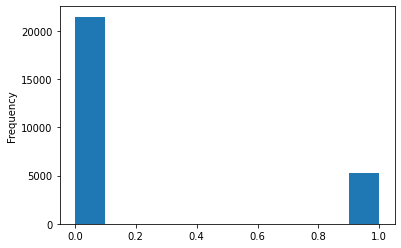

In [6]:
#Getting a histogram for a column
tips["pressure_injury"].plot(kind='hist')
plt.show()

In [7]:
#Getting a correlation matrix for the dataset
tips.corr()

,age,bmi,diabetes,smoker,heart_cvs,kidney_conditions,respiratory_illnesses,urogenital_illnesses,sepsis,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
age,1.000000,-0.092573,0.070190,-0.044823,0.357679,0.099768,0.071873,0.129530,0.019458,0.019477,0.034835,0.172381,-0.013596,-0.041081,-0.022503,0.003250,-0.074890,-0.062539,0.089063
bmi,-0.092573,1.000000,0.170258,-0.022152,0.080311,0.025908,0.038752,0.007822,0.018928,-0.003802,-0.046298,0.069780,0.020619,0.004804,0.005256,-0.017107,0.035961,0.034542,-0.009872
diabetes,0.070190,0.170258,1.000000,-0.000266,0.137787,0.188994,-0.001360,0.023886,0.026813,-0.001033,0.047716,0.134620,0.052976,-0.015945,-0.015752,-0.016352,-0.003453,-0.014783,0.079668
smoker,-0.044823,-0.022152,-0.000266,1.000000,0.006570,-0.003213,0.056550,-0.027677,-0.005699,0.000323,0.053706,0.095585,-0.006363,0.006372,0.003888,-0.000560,-0.011841,0.004717,0.016307
heart_cvs,0.357679,0.080311,0.137787,0.006570,1.000000,0.045420,0.037476,0.027548,0.050004,0.003366,-0.002513,0.223574,-0.006545,-0.034810,-0.008101,-0.028695,-0.075039,-0.070246,0.023558
kidney_conditions,0.099768,0.025908,0.188994,-0.003213,0.045420,1.000000,0.171102,0.116284,0.265663,0.133820,0.212938,-0.058391,0.059642,-0.008249,0.022574,-0.006859,0.045646,0.012537,0.222263
respiratory_illnesses,0.071873,0.038752,-0.001360,0.056550,0.037476,0.171102,1.000000,0.081674,0.208144,0.302545,0.088728,-0.107617,0.035005,0.048334,0.050616,0.010242,0.037818,0.027318,0.238205
urogenital_illnesses,0.129530,0.007822,0.023886,-0.027677,0.027548,0.116284,0.081674,1.000000,0.122456,0.060415,0.078183,-0.045737,0.017308,0.074382,0.015611,0.021897,0.009475,-0.005296,0.131910
sepsis,0.019458,0.018928,0.026813,-0.005699,0.050004,0.265663,0.208144,0.122456,1.000000,0.189108,0.119688,-0.086391,0.085264,0.041071,0.037893,-0.017066,0.076517,0.031334,0.235108
pneumonia,0.019477,-0.003802,-0.001033,0.000323,0.003366,0.133820,0.302545,0.060415,0.189108,1.000000,0.076050,-0.096928,0.005361,0.026646,0.049838,-0.006085,0.027818,0.005710,0.174264


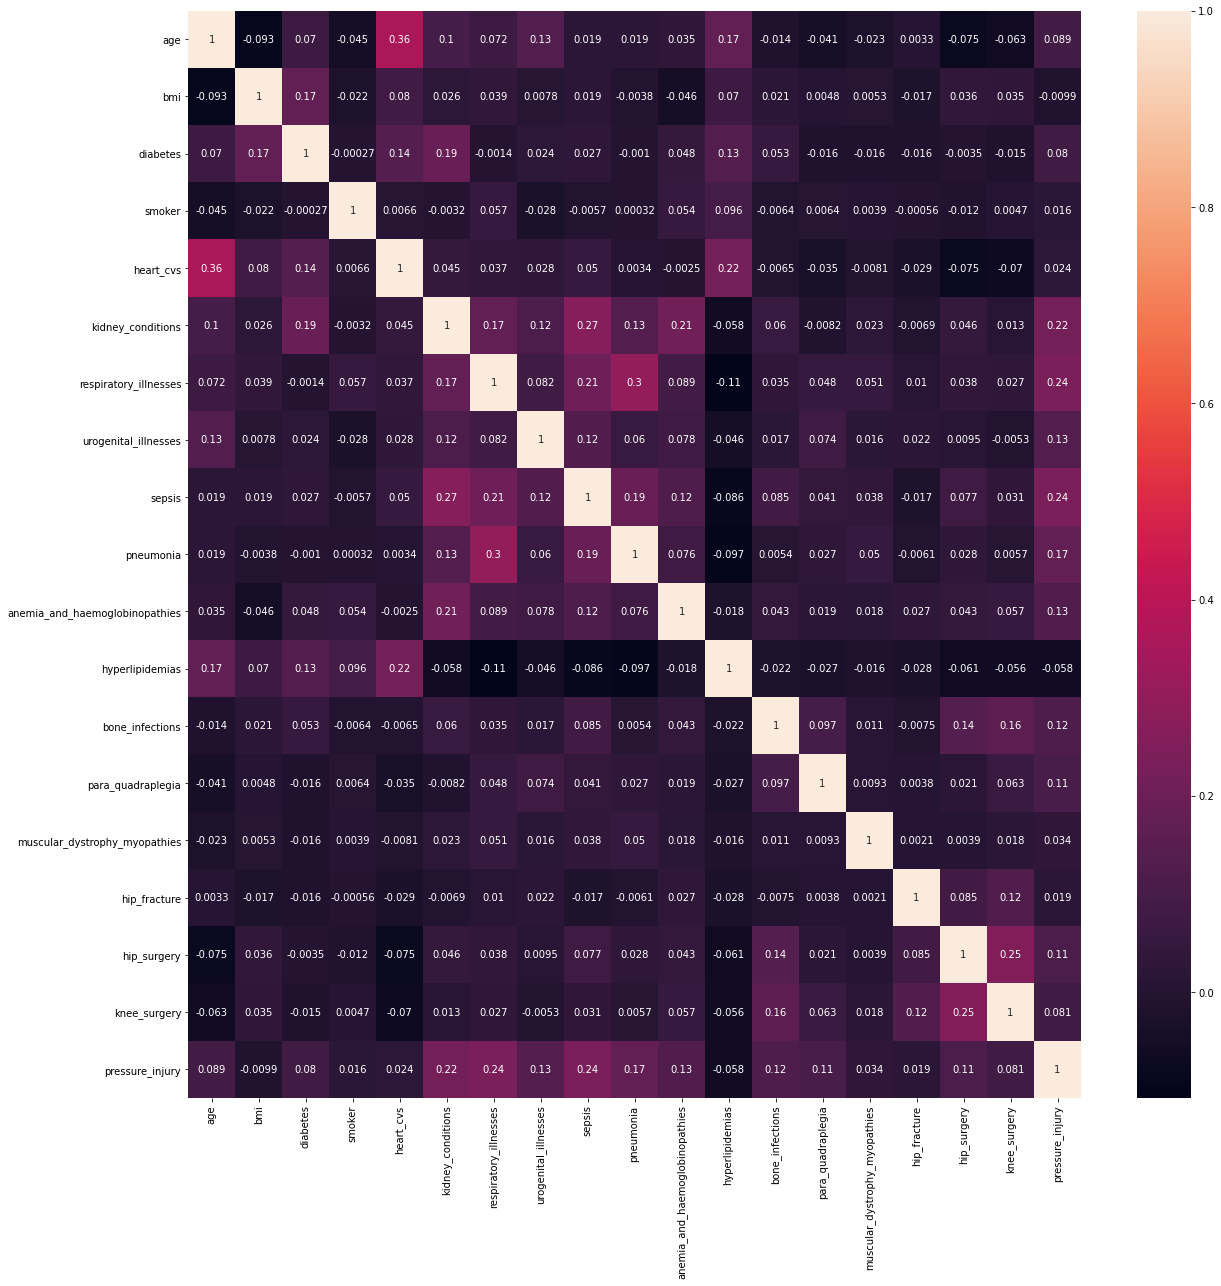

In [12]:
#Getting a heatmap using seaborn and matplot lib
corrMatrix = tips.corr()
plt.figure(figsize = (20,20))
sn.heatmap(corrMatrix, annot=True)
plt.show()

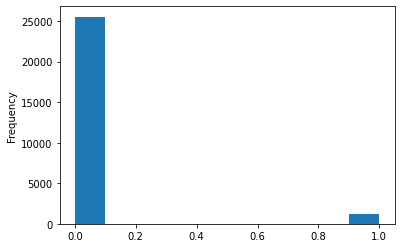

In [13]:
#Getting a histogram for a column
tips["knee_surgery"].plot(kind='hist')
plt.show()

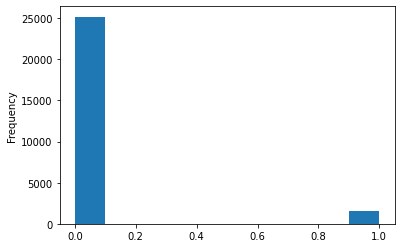

In [14]:
#Getting a histogram for a column
tips["hip_surgery"].plot(kind='hist')
plt.show()

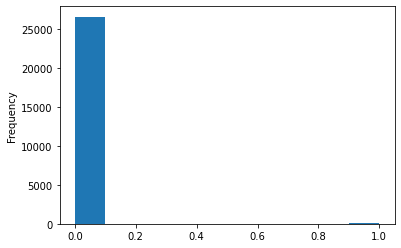

In [15]:
#Getting a histogram for a column
tips["muscular_dystrophy_myopathies"].plot(kind='hist')
plt.show()

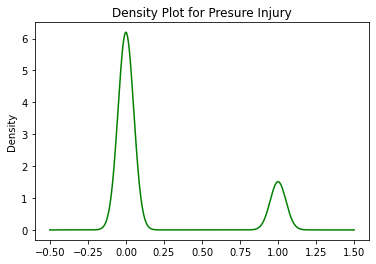

In [17]:
#Getting a density plot for a column
tips.pressure_injury.plot.density(color='green')
plt.title('Density Plot for Presure Injury')
plt.show()

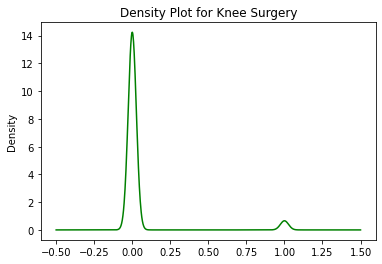

In [18]:
#Getting a density plot for a column

tips.knee_surgery.plot.density(color='green')
plt.title('Density Plot for Knee Surgery')
plt.show()

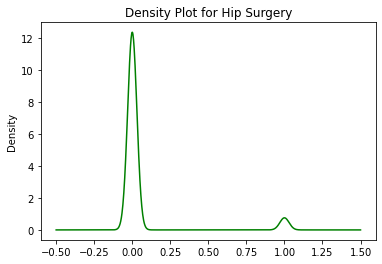

In [20]:
#Getting a density plot for a column

tips.hip_surgery.plot.density(color='green')
plt.title('Density Plot for Hip Surgery')
plt.show()

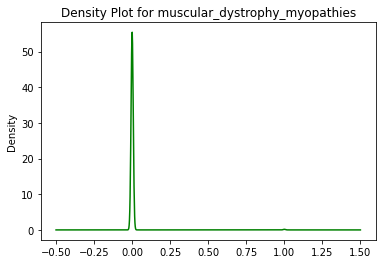

In [21]:
#Getting a density plot for a column

tips.muscular_dystrophy_myopathies.plot.density(color='green')
plt.title('Density Plot for muscular_dystrophy_myopathies')
plt.show()

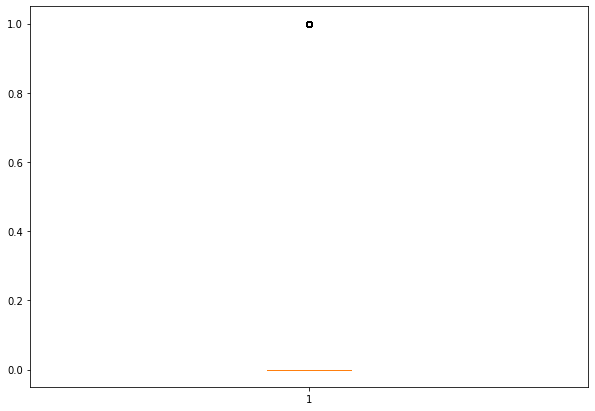

In [23]:
#Getting a box plot for a column
fig = plt.figure(figsize =(10, 7))
plt.boxplot(tips["pressure_injury"])
plt.show()

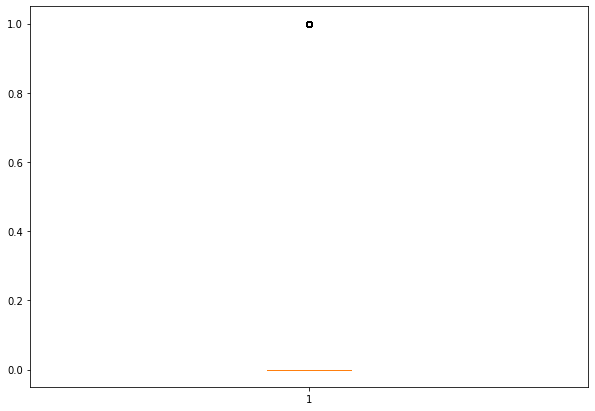

In [3]:
#Getting a box plot for a column
fig = plt.figure(figsize =(10, 7))
plt.boxplot(tips["knee_surgery"])
plt.show()

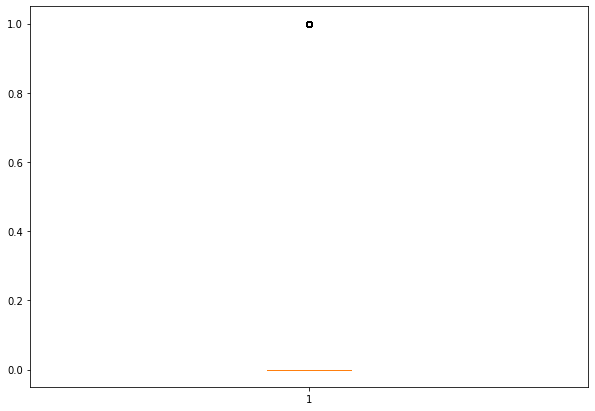

In [2]:
#Getting a box plot for a column
fig = plt.figure(figsize =(10, 7))
plt.boxplot(tips["hip_surgery"])
plt.show()

In [14]:
#Checks for empty rows in a column
df = tips["knee_surgery"]
bool_series = df.isnull()
df[bool_series]

Series([], Name: knee_surgery, dtype: int64)

In [11]:
#Checks for columns that are not empty in a column
df = tips["pressure_injury"]
bool_series = df.notnull()
df[bool_series]

0        1
1        0
2        0
3        0
4        0
        ..
26717    0
26718    0
26719    0
26720    0
26721    0
Name: pressure_injury, Length: 26722, dtype: int64

In [7]:
#Fills in empty rows in a column with previous value
test = tips["pressure_injury"]
test.fillna(method = 'pad')

0        1
1        0
2        0
3        0
4        0
        ..
26717    0
26718    0
26719    0
26720    0
26721    0
Name: pressure_injury, Length: 26722, dtype: int64

In [6]:
#Looking for any null values
tips.isnull()

,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26718,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26719,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
26720,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
#print head of cvs file
tips.head()


,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,M,76.52,32.40,C,B,D,C,D,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,M,41.79,30.54,D,B,D,D,C,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,F,39.86,35.97,C,A,D,C,B,1,0,...,0,0,1,0,0,0,0,0,0,0.0
3,F,47.82,25.43,C,A,D,C,C,0,0,...,0,0,1,0,0,0,0,0,0,0.0
4,F,47.45,24.53,B,B,D,C,B,0,0,...,0,0,1,0,0,0,0,0,0,NaN


In [2]:
#Replace null values with a 2
tips.at[4, 'pressure_injury'] = None
tips = tips.replace(to_replace =np.nan, value = 2)
tips.head()

,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,M,76.52,32.40,C,B,D,C,D,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,M,41.79,30.54,D,B,D,D,C,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,F,39.86,35.97,C,A,D,C,B,1,0,...,0,0,1,0,0,0,0,0,0,0.0
3,F,47.82,25.43,C,A,D,C,C,0,0,...,0,0,1,0,0,0,0,0,0,0.0
4,F,47.45,24.53,B,B,D,C,B,0,0,...,0,0,1,0,0,0,0,0,0,2.0


In [41]:
#Interpolate missing values
tips.at[3, 'pressure_injury'] = None
tips = tips.interpolate(method ='linear', limit_direction = 'forward')
tips.head()

,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,M,76.52,32.40,C,B,D,C,D,0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,M,41.79,30.54,D,B,D,D,C,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,F,39.86,35.97,C,A,D,C,B,1,0,...,0,0,1,0,0,0,0,0,0,0.0
3,F,47.82,25.43,C,A,D,C,C,0,0,...,0,0,1,0,0,0,0,0,0,1.0
4,F,47.45,24.53,B,B,D,C,B,0,0,...,0,0,1,0,0,0,0,0,0,2.0


In [2]:
#Print different value counts in column
tips['pressure_injury'].value_counts()

0    21477
1     5245
Name: pressure_injury, dtype: int64

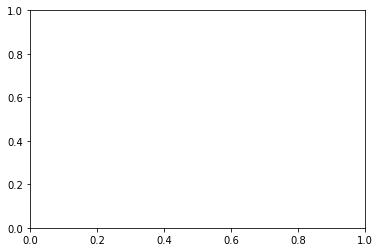

In [10]:
# # X = tips[tips.columns[:-1]].values
# y = tips['pressure_injury'].values

# ax = plt.gca()

In [14]:
# rus = RandomUnderSampler(random_state=0)
# rus.fit(X, y)
# X_resampled, y_resampled = rus.sample(X, y)
# colors = ['white' if v == 0 else 'black' if v == 1 else '#67a9cf' for v in y_resampled]
# plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
# sns.despine()
# plt.title("RandomUnderSampler Output")
# pass

In [38]:
#X = tips[tips.columns[:-1]].values
#X = tips['pressure_injury'].values
#Assign values of columns to X and Y axis
# X = tips[['hip_surgery', 'knee_surgery', 'pressure_injury']].values
# y = tips['pressure_injury'].values
y = tips["pressure_injury"].values
X = tips.drop('pressure_injury', axis = 1).values

In [39]:
#Printing number of 1s and 0s
counter = Counter(y)
print(counter)

Counter({0: 21477, 1: 5245})


In [40]:
#Oversampling
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({1: 21477, 0: 21477})


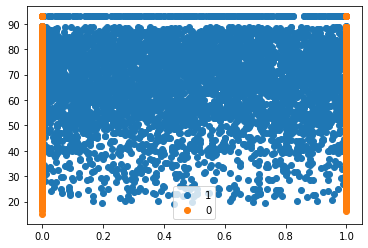

In [44]:
#Scatterplot for oversampled data

for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [48]:
#Printing ratios for 0 and 1 values
# X = tips[['hip_surgery', 'knee_surgery', 'pressure_injury']].values
# y = tips['pressure_injury'].values
y = tips["pressure_injury"].values
X = tips.drop('pressure_injury', axis = 1).values
counter = Counter(y)
print(counter)

Counter({0: 21477, 1: 5245})


Counter({0: 12886, 1: 6443})


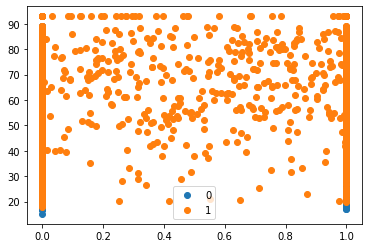

In [50]:
#Undersampling
# X = tips[['hip_surgery', 'knee_surgery', 'pressure_injury']].values
# y = tips['pressure_injury'].values
y = tips["pressure_injury"].values
X = tips.drop('pressure_injury', axis = 1).values
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X, y = pipeline.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [21]:
label_encoder = preprocessing.LabelEncoder()

tips['gender']= label_encoder.fit_transform(tips['gender'])
  
tips['gender'].unique()

array([1, 0], dtype=int64)

In [22]:
tips.head()

,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury,gdner
0,1,76.52,32.40,C,B,D,C,D,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,41.79,30.54,D,B,D,D,C,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,39.86,35.97,C,A,D,C,B,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,47.82,25.43,C,A,D,C,C,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,47.45,24.53,B,B,D,C,B,0,0,...,0,1,0,0,0,0,0,0,0,0


In [88]:
swap = {"gender": {"M": 0, "F": 1}}
tips = tips.replace(swap)
tips.head()

,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,0,76.52,32.40,C,B,D,C,D,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,41.79,30.54,D,B,D,D,C,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,39.86,35.97,C,A,D,C,B,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,47.82,25.43,C,A,D,C,C,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,47.45,24.53,B,B,D,C,B,0,0,...,0,0,1,0,0,0,0,0,0,0


In [100]:
label_encoder = preprocessing.LabelEncoder()
tips['sensory_perception_score']= label_encoder.fit_transform(tips['sensory_perception_score'])
tips['sensory_perception_score'].unique()

label_encoder = preprocessing.LabelEncoder()
tips['moisture_score']= label_encoder.fit_transform(tips['moisture_score'])
tips['moisture_score'].unique()

label_encoder = preprocessing.LabelEncoder()
tips['activity_score']= label_encoder.fit_transform(tips['activity_score'])
tips['activity_score'].unique()

label_encoder = preprocessing.LabelEncoder()
tips['mobility_score']= label_encoder.fit_transform(tips['mobility_score'])
tips['mobility_score'].unique()

label_encoder = preprocessing.LabelEncoder()
tips['nutrition_score']= label_encoder.fit_transform(tips['nutrition_score'])
tips['nutrition_score'].unique()
tips.head()



,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,0,76.52,32.40,2,1,3,2,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,41.79,30.54,3,1,3,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,39.86,35.97,2,0,3,2,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,47.82,25.43,2,0,3,2,2,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,47.45,24.53,1,1,3,2,1,0,0,...,0,0,1,0,0,0,0,0,0,0


,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,0,76.52,32.40,2,1,D,C,D,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,41.79,30.54,3,1,D,D,C,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,39.86,35.97,2,0,D,C,B,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,47.82,25.43,2,0,D,C,C,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,47.45,24.53,1,1,D,C,B,0,0,...,0,0,1,0,0,0,0,0,0,0


In [92]:
label_encoder = preprocessing.LabelEncoder()
tips['mobility_score']= label_encoder.fit_transform(tips['mobility_score'])
tips['mobility_score'].unique()
tips.head()

,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,0,76.52,32.40,2,1,3,2,D,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,41.79,30.54,3,1,3,3,C,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,39.86,35.97,2,0,3,2,B,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,47.82,25.43,2,0,3,2,C,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,47.45,24.53,1,1,3,2,B,0,0,...,0,0,1,0,0,0,0,0,0,0


In [93]:
label_encoder = preprocessing.LabelEncoder()
tips['nutrition_score']= label_encoder.fit_transform(tips['nutrition_score'])
tips['nutrition_score'].unique()
tips.head()

,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery,pressure_injury
0,0,76.52,32.40,2,1,3,2,3,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,41.79,30.54,3,1,3,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,39.86,35.97,2,0,3,2,1,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1,47.82,25.43,2,0,3,2,2,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,47.45,24.53,1,1,3,2,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
tips.groupby('pressure_injury').mean()

,gender,age,bmi,sensory_perception_score,moisture_score,activity_score,mobility_score,nutrition_score,diabetes,smoker,...,sepsis,pneumonia,anemia_and_haemoglobinopathies,hyperlipidemias,bone_infections,para_quadraplegia,muscular_dystrophy_myopathies,hip_fracture,hip_surgery,knee_surgery
pressure_injury,,,,,,,,,,,,,,,,,,,,,
0,0.400847,64.01601,29.114393,0.987522,0.428458,2.884621,1.425618,1.681985,0.286167,0.122177,...,0.089398,0.123527,0.301299,0.345719,0.006565,0.003911,0.002095,0.007962,0.044652,0.035945
1,0.415062,67.56599,28.924318,1.341277,0.722974,2.975977,1.779218,1.864061,0.378456,0.135748,...,0.287321,0.282173,0.450524,0.277026,0.040991,0.029361,0.006864,0.012393,0.110963,0.077979


In [106]:
y = tips["pressure_injury"]
X = tips.drop('pressure_injury', axis = 1)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)

StandardScaler()

NameError: name 'StandardScaler' is not defined

In [102]:
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [103]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(tips.head())

(21377, 24) (5345, 24) (21377,) (5345,)
   gender    age    bmi  sensory_perception_score  moisture_score  \
0       0  76.52  32.40                         2               1   
1       0  41.79  30.54                         3               1   
2       1  39.86  35.97                         2               0   
3       1  47.82  25.43                         2               0   
4       1  47.45  24.53                         1               1   

   activity_score  mobility_score  nutrition_score  diabetes  smoker  ...  \
0               3               2                3         0       0  ...   
1               3               3                2         0       0  ...   
2               3               2                1         1       0  ...   
3               3               2                2         0       0  ...   
4               3               2                1         0       0  ...   

   pneumonia  anemia_and_haemoglobinopathies  hyperlipidemias  \
0          0     

In [104]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

c:\users\pdarg\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()